In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import random_split
import torch.nn.functional as F
#import torch.optim as optim

import pandas as pd
import seaborn as sns


In [ ]:
# %load NNs.py
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import random_split
import torch.nn.functional as F
import numpy as np


class CNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.InputDropout = nn.Dropout(p=0.2)

        self.ConvBlock1 = torch.nn.Sequential(
            nn.Conv2d(3, 96, 3, padding=1),
            nn.BatchNorm2d(num_features=96),
            nn.ReLU(),
            #nn.Dropout(0.2),
        )

        self.ConvBlock2 =  torch.nn.Sequential(
            nn.Conv2d(96, 96, 3,padding=1),
            nn.BatchNorm2d(num_features=96),
            nn.ReLU(),
            #nn.Dropout(0.3),
        )

        #self.PoolBlock1 = torch.nn.Sequential(
            #nn.Conv2d(96, 96, 3, stride=2),
            #nn.BatchNorm2d(num_features=96),
            #nn.ReLU(),
            #nn.Dropout()
        #)

        self.PoolBlock1 = torch.nn.Sequential(
            nn.Conv2d(96, 96, 3, stride=2, padding=1),
            nn.BatchNorm2d(num_features=96),
            nn.ReLU(),
            nn.Dropout()
        )

        self.ConvBlock3 = torch.nn.Sequential(
            nn.Conv2d(96, 192, 3, padding=1),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            #nn.Dropout(0.3),
        )

        self.ConvBlock4 = torch.nn.Sequential(
            nn.Conv2d(192, 192, 3, padding=1),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
        )


        #self.PoolBlock2 = torch.nn.Sequential(
            #nn.Conv2d(192, 192, 3, stride=2),
            #nn.BatchNorm2d(num_features=192),
            #nn.ReLU(),
            #nn.Dropout()
        #)
        
        self.PoolBlock2 = torch.nn.Sequential(
            nn.Conv2d(192, 192, 3, stride=2, padding=1),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            nn.Dropout()
        )

        #self.ConvBlock5 = torch.nn.Sequential(
            #nn.Conv2d(192, 192, 3, padding=1),
            #nn.BatchNorm2d(num_features=192),
            #nn.ReLU(),
            ##nn.Dropout(),
        #)

        self.ConvBlock5 = torch.nn.Sequential(
            nn.Conv2d(192, 192, 3),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
            #nn.Dropout(),
        )

        self.LinLayer1 = torch.nn.Sequential(
            nn.Conv2d(192, 192, 1),
            nn.BatchNorm2d(num_features=192),
            nn.ReLU(),
        )

        self.LinLayer2 = torch.nn.Sequential(
            nn.Conv2d(192, 10, 1),
            nn.BatchNorm2d(num_features=10),
            nn.ReLU(),
        )

        self.FinalPool = nn.AvgPool2d(6)


    def forward(self, x):
        #x = self.ConvLayers(x)
        #x = torch.squeeze(x)

        # return x

        x = self.InputDropout(x)

        x = self.ConvBlock1(x)
        x = self.ConvBlock2(x)
        
        x = self.PoolBlock1(x)

        x = self.ConvBlock3(x)
        x = self.ConvBlock4(x)

        x = self.PoolBlock2(x)

        x = self.ConvBlock5(x)

        x = self.LinLayer1(x)
        x = self.LinLayer2(x)

        x = self.FinalPool(x)

        x = torch.squeeze(x)

        return x


def calculate_accuracy(model, testloader, device):
    with torch.no_grad():

        running_samples_total = 0
        correct_predictions_total = 0
            
        for indx, data in enumerate(testloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            prediction = model(inputs)
            _, tensor_index = torch.max(prediction, dim=1)

            
            correct_predictions_total += (len(labels[labels==tensor_index]))
            running_samples_total += prediction.shape[0]

        return correct_predictions_total/running_samples_total


class PrintLayer(nn.Module):
    def __init__(self):
        super(PrintLayer, self).__init__()
    
    def forward(self, x):
        # Do your print / debug stuff here
        print(x.shape)
        return x



#def init_weights(m, generator=np.random.default_rng(0)):
    #bias_val = generator.uniform(-0.05, 0.05)
    #print(bias_val)

    #if isinstance(m, nn.Linear):
        #torch.nn.init.xavier_uniform_(m.weight)
        #m.bias.data.fill_(bias_val)
    
def init_weights(m, ):
    bias_val = torch.FloatTensor(1).uniform_(-0.05, 0.05)[0]

    #print(bias_val)

    if isinstance(m, nn.Linear):
        print('here')
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(bias_val)

    if isinstance(m, nn.Conv2d):
        print(bias_val)
        #print('bruh')
        torch.nn.init.xavier_uniform_(m.weight, 10)
        m.bias.data.fill_(bias_val)


class Blur(nn.Module):
    def __init__(self):
        super(Blur, self).__init__()
        self.layers = torch.nn.Sequential(
            nn.MaxPool2d(4)
        )

    def forward(self,x):
       x = self.layers(x)
       #print(x.shape)
       x = F.interpolate(x, size=(32, 32), mode='nearest')
       return x

In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)

testvalset = torchvision.datasets.CIFAR10(root='./data/', train=False,
                                          download=False, transform=transform)

testset, valset = random_split(testvalset, [0.5, 0.5])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

print(len(trainset))
print(len(testset))
print(len(valset))

# print(len(dataset))

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
50000
5000
5000


In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [11]:

from NNs import init_weights, CNN

model = CNN().to(device)
model.apply(init_weights)

CNN(
  (InputDropout): Dropout(p=0.2, inplace=False)
  (ConvBlock1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (ConvBlock2): Sequential(
    (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (PoolBlock1): Sequential(
    (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (ConvBlock3): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (ConvBlock4): Sequential(
    (0): Conv2d(192, 192, kerne

In [12]:
#print_output_shape = False


#data_iter = iter(trainset)

#for i in range(3):
    #(data, label) = next(data_iter)
#im = data
#data = data.unsqueeze(0)
#input_shape = data.shape

#if (print_output_shape):
    #print(data.shape)
    #print(model(data))
    #print('\n')


#from torchsummary import summary
#_ = summary(model, ( 3, 32, 32))

#print(model(data).shape)

In [13]:
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.97)


In [ ]:
#epoch_number = 75
#epoch_number = 130
epoch_number = 10

from Helper_Functions import calculate_valloss, calculate_accuracy, save_checkpoint


epoch_list = []
loss_list = []

val_accuracy_list = []
val_loss_list = []
epoch_range_list = list(range(epoch_number))


for epoch in range(epoch_number):  # loop over the dataset multiple times
    n_batches = 0
    running_loss = 0.0


    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
       
        outputs = model(inputs)
        #print(outputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        n_batches += 1

    epoch_list.append(epoch+1)
    loss_list.append(running_loss/n_batches)
    
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / n_batches:.7f}')
    running_loss = 0.0

    val_accuracy_list.append(calculate_accuracy(model, valloader, device))
    val_loss_list.append(calculate_valloss(model, criterion, valloader, device))


    if (epoch+1) % 5 == 0:
        save_checkpoint(model, optimizer, epoch+1, loss.item(), filename=f"checkpoints2/checkpoint_{epoch + 1}.pth")
        

    scheduler.step()


print('Finished Training')

[1,   391] loss: 1.7694934
[2,   391] loss: 1.4212222
[3,   391] loss: 1.2275970
[4,   391] loss: 1.1072826
[5,   391] loss: 1.0138897
Checkpoint saved at epoch 5
[6,   391] loss: 0.9420041
[7,   391] loss: 0.8749478
[8,   391] loss: 0.8217679
[9,   391] loss: 0.7759236
[10,   391] loss: 0.7421735
Checkpoint saved at epoch 10
[11,   391] loss: 0.7152008
[12,   391] loss: 0.6874824
[13,   391] loss: 0.6673529
[14,   391] loss: 0.6409070
[15,   391] loss: 0.6220312
Checkpoint saved at epoch 15
[16,   391] loss: 0.6059974
[17,   391] loss: 0.5863775
[18,   391] loss: 0.5661466
[19,   391] loss: 0.5526270
[20,   391] loss: 0.5443280
Checkpoint saved at epoch 20
[21,   391] loss: 0.5334140


KeyboardInterrupt: 

Text(0.5, 1.0, 'Training Loss')

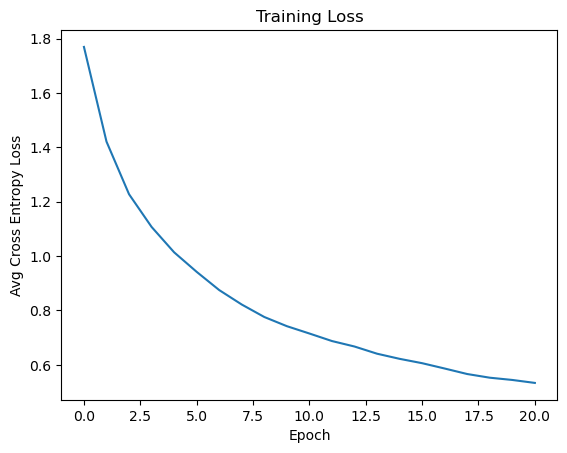

In [15]:
dic = {'losses':loss_list, 'epoch':epoch_list}
df = pd.DataFrame(data=dic)
#df = df[150:]

p = sns.lineplot(data=df, x=df.index, y='losses')
p.set_xlabel("Epoch")
p.set_ylabel("Avg Cross Entropy Loss")
p.set_title("Training Loss")


Text(0.5, 1.0, 'Validation Accuracy per Epoch')

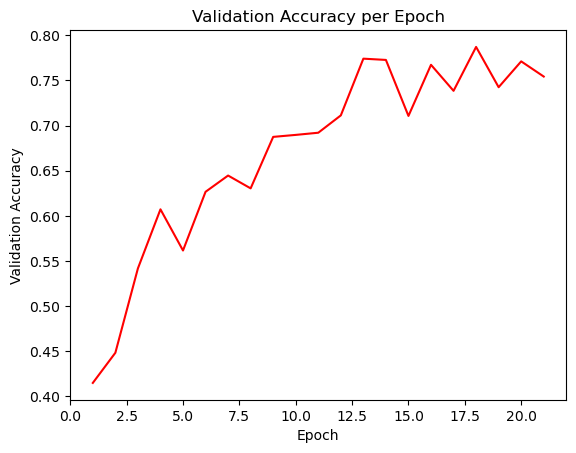

In [16]:
dic2 = {'Validation Accuracy':val_accuracy_list, 'Epoch':epoch_list}
df2 = pd.DataFrame(data=dic2)

p2 = sns.lineplot(data=df2, x='Epoch', y='Validation Accuracy', color='red')
p2.set_title('Validation Accuracy per Epoch')



[1.6320244073867798, 1.6213535070419312, 1.3522151708602905, 1.1359009742736816, 1.3204845190048218, 1.076079249382019, 1.0314682722091675, 1.0634607076644897, 0.9149898886680603, 0.9058472514152527, 0.8928331732749939, 0.85871422290802, 0.6906471252441406, 0.6814119219779968, 0.8372191786766052, 0.6985188722610474, 0.767341136932373, 0.6504281759262085, 0.7763234376907349, 0.7634300589561462, 0.7566976547241211]


Text(0.5, 1.0, 'Validation Loss per Epoch')

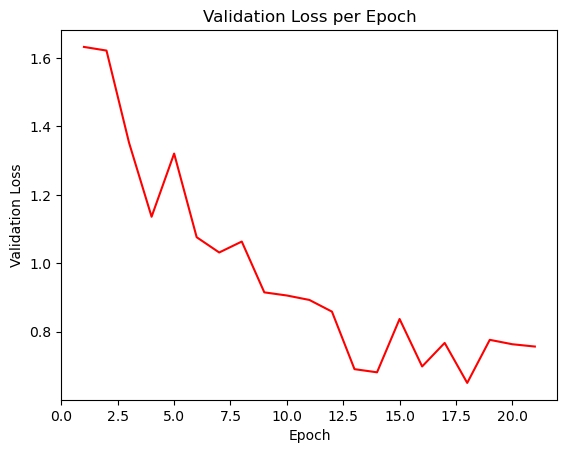

In [17]:
val_loss_list_tensor = [float(x) for x in val_loss_list]
print(val_loss_list_tensor)

dic3 = {'Validation Loss':val_loss_list_tensor, 'Epoch':epoch_list}
df3 = pd.DataFrame(data=dic3)

p3 = sns.lineplot(data=df3, x='Epoch', y='Validation Loss', color='red')
p3.set_title('Validation Loss per Epoch')

Text(0.5, 1.0, 'Loss per Epoch')

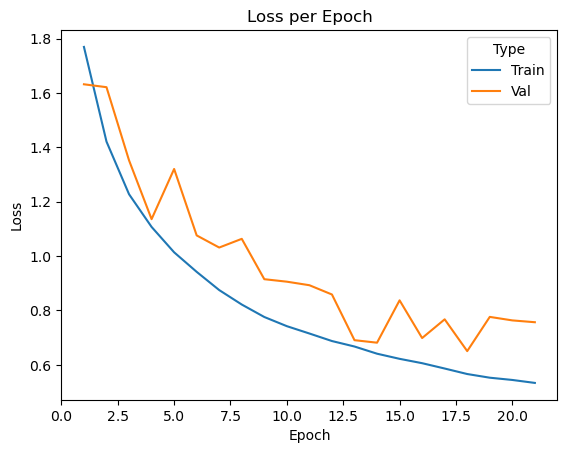

In [20]:

val_loss_list_tensor = [float(x) for x in val_loss_list]

dic3 = {'Loss':val_loss_list_tensor, 'Epoch':epoch_list}
dic3_df = pd.DataFrame(data=dic3)
dic3_df['Type'] = 'Val'

dic = {'Loss':loss_list, 'epoch':epoch_list}
dic_df = pd.DataFrame(data=dic)
dic_df['Type'] = 'Train'

combined_df = pd.concat([dic_df,dic3_df])

p = sns.lineplot(data=combined_df, x='Epoch', y='Loss', hue='Type')
p.set_title('Loss per Epoch')

In [ ]:
test_single_image = False

if (test_single_image):
    data_iter = iter(testset)

    for i in range(40):
        (data, label) = next(data_iter)
    im = data
    data = data.unsqueeze(0)
    soft = nn.Softmax(dim=1)
    imshow(im)
    print(label)

    model_output = model(data)
    prediction = soft(model_output)

    _, ind = (torch.max(prediction, dim=1))
    print(ind)
    print("\n")

#from torchviz import make_dot, make_dot_from_trace
#make_dot(model_output.mean(), params=dict(model.named_parameters()))




In [ ]:

calculate_accuracy(model, testloader, device)


0.8438

### Code to save Model

In [ ]:
#torch.save(model.state_dict(), "model_weights_130_epochs")